**Exercise One**
1. Truth table
2. Network structure diagram
3. Weights and biases
4. Graphical state space representation 

*for perceptrons or MLPs that perform the following operations: AND, NAND, OR & XOR.*

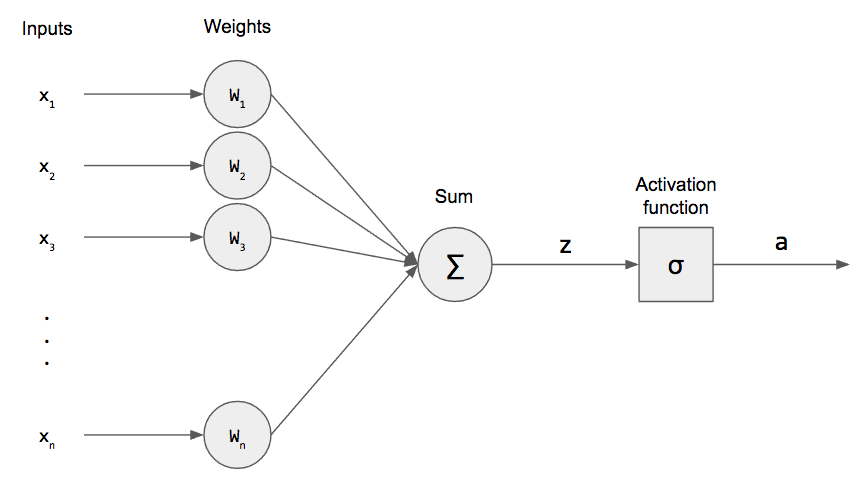

In [2]:
import scipy.special as sc #importing libraries we'll need
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def perceptron(inputs_list, weights_list, bias):
  inputs = np.array(inputs_list)
  weights = np.array(weights_list)
  summed = np.dot(inputs, weights)
  summed+=bias
  output = 1 if summed > 0 else 0
  return output 

Creating list of all possible imputs and running our perceptron in AND mode

In [4]:
inputs_list =[[0.0, 0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]]
weights = [1.0, 1.0]
bias = -1

In [5]:
for i in inputs_list:
    print(i)
    #print("Weights:" ,weights)
    #print("Bias: ", bias)
    print("Result: ", perceptron(i, weights, bias))

[0.0, 0.0]
Result:  0
[0.0, 1.0]
Result:  0
[1.0, 0.0]
Result:  0
[1.0, 1.0]
Result:  1


Now let's run our perceptron in OR mode: 
w1 = 1, w2 = 1, b = -0.5

In [6]:
weights_or = [1, 1]
bias_or = -0.5
for i in inputs_list:
    print(i)
    #print("Weights:" ,weights)
    #print("Bias: ", bias)
    print("Result: ", perceptron(i, weights_or, bias_or))

[0.0, 0.0]
Result:  0
[0.0, 1.0]
Result:  1
[1.0, 0.0]
Result:  1
[1.0, 1.0]
Result:  1


A single perceptron with an Heaviside activation function can implement each one of the fundamental logical functions: NOT, AND and OR.
They are called fundamental because any logical function, no matter how complex, can be obtained by a combination of those three. We can infer that, if we appropriately connect the three perceptrons we just built, we can implement any logical function! 

So let's build NOT gate first!

let’s pick w = -1 and b = 0.5.

Input for not is 1-dimensional

In [7]:
def perceptron_not(input, weight=-1, bias=0.5):
  summed = input*weight+bias
  output = 1 if summed > 0 else 0
  return output
input_fot_not_test=[0,1]
for i in input_fot_not_test:
    print(i)
    #print("Weights:" ,weights)
    #print("Bias: ", bias)
    print("Result: ", perceptron_not(i))

0
Result:  1
1
Result:  0


XOR

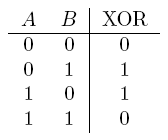

In [8]:
def XOR_perceptron(inputs_list,weights,bias, weights_or,bias_or):
    gate_1 = np.array(perceptron(inputs_list,weights,bias))
    gate_2 = np.array(perceptron_not(gate_1))
    gate_3 = np.array(perceptron(inputs_list,weights_or,bias_or))
    new_x = np.array([gate_2, gate_3])
    output = perceptron(new_x,weights,bias)
    return output

In [9]:
for i in inputs_list:
    print(i)
    print("Result: ", XOR_perceptron(i,weights,bias,weights_or,bias_or))

[0.0, 0.0]
Result:  0
[0.0, 1.0]
Result:  1
[1.0, 0.0]
Result:  1
[1.0, 1.0]
Result:  0


NAND gate



0 NAND 0 ==1

0 NAND 1 ==1


1 NAND	0 ==	1

1 NAND	1 ==	0 

In [10]:
def NAND_perceptron(inputs_list,weights,bias):
    return perceptron_not(perceptron(inputs_list,weights,bias))

In [11]:
for i in inputs_list:
  print(i)
  print(NAND_perceptron(i,weights,bias))

[0.0, 0.0]
1
[0.0, 1.0]
1
[1.0, 0.0]
1
[1.0, 1.0]
0


Vector space of input vectors and (if they exist) linear separators of perceptrons:

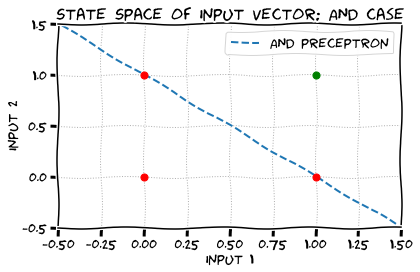

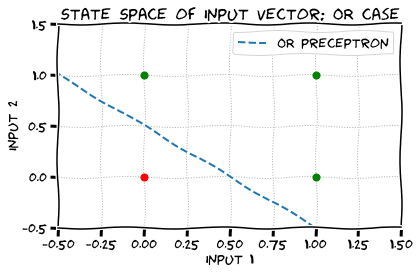

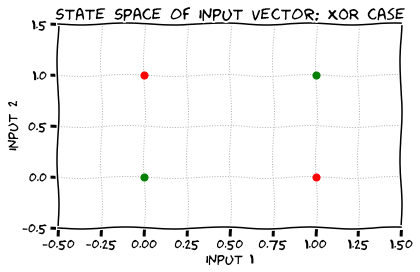

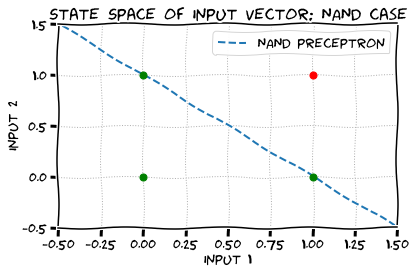

In [29]:
 fig = plt.xkcd()
plt.scatter(0, 0, s=50, color="red", zorder=3) 
plt.scatter(0, 1, s=50, color="red", zorder=3) 
plt.scatter(1, 0, s=50, color="red", zorder=3) 
plt.scatter(1, 1, s=50, color="green", zorder=3) 
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
x = np.linspace(-1, 10, 1000)
plt.plot(x, -(weights[1]/weights[0])*x-bias/weights[0], linestyle='dashed',label='AND preceptron')
plt.legend()
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("State Space of Input Vector: AND case")
plt.grid(True, linewidth=1, linestyle=':')
plt.tight_layout()
plt.show()

fig_or = plt.xkcd()
plt.scatter(0, 0, s=50, color="red", zorder=3) 
plt.scatter(0, 1, s=50, color="green", zorder=3) 
plt.scatter(1, 0, s=50, color="green", zorder=3) 
plt.scatter(1, 1, s=50, color="green", zorder=3)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
x = np.linspace(-1, 10, 1000)
plt.plot(x, -(weights_or[1]/weights_or[0])*x-bias_or/weights_or[0], linestyle='dashed',label='OR preceptron')
plt.legend()
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("State Space of Input Vector: OR case")
plt.grid(True, linewidth=1, linestyle=':') 
plt.tight_layout()
plt.show()

fig_xor = plt.xkcd()
plt.scatter(0, 0, s=50, color="green", zorder=3) 
plt.scatter(0, 1, s=50, color="red", zorder=3) 
plt.scatter(1, 0, s=50, color="red", zorder=3) 
plt.scatter(1, 1, s=50, color="green", zorder=3)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("State Space of Input Vector: XOR case")
plt.grid(True, linewidth=1, linestyle=':')
plt.tight_layout()
plt.show()

fig_nand = plt.xkcd()
plt.scatter(0, 0, s=50, color="green", zorder=3) 
plt.scatter(0, 1, s=50, color="green", zorder=3) 
plt.scatter(1, 0, s=50, color="green", zorder=3) 
plt.scatter(1, 1, s=50, color="red", zorder=3)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
x = np.linspace(-1, 10, 1000)
plt.plot(x, -(weights[1]/weights[0])*x-bias/weights[0], linestyle='dashed',label='NAND preceptron')
plt.legend()
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.title("State Space of Input Vector: NAND case")
plt.grid(True, linewidth=1, linestyle=':')
plt.tight_layout()
plt.show()



**Exercice 2**



a) Train, and test a neural network for classifying 
the data in the MNIST hand-written character data set. Optimise your network structure (numbers of 
neurons, learning rate, number of training iterations) – what is the best score you can achieve?


b) Repeat this exercise with the MNIST Fashion data set, again finding the best network structure – if the best score is different from the hand-written 
character dataset then explain why.



c) Based on your answers to (a) and (b), what alternative methods (either AI based or traditional signal 
processing) would you suggest in order to improve the overall score on both data sets?

In [53]:
import scipy.special as ss

class NeuralNetwork:
  def _init_ (self, input_nodes, hidden_nodes, output_nodes, learning_rate):
    # Set the number of nodes in each input, hidden and output layer
    self.i_nodes = input_nodes
    self.h_nodes = hidden_nodes 
    self.o_nodes = output_nodes # Weight matrices, wih (input -> hidden) and who (hidden -> output)
    self.wih = np.random.normal(0.0, pow(self.h_nodes, -0.5), (self.h_nodes, self.i_nodes)) 
    self.who = np.random.normal(0.0, pow(self.o_nodes, -0.5), (self.o_nodes, self.h_nodes))
    # Set the learning rate 
    self.lr = learning_rate
    # Set the activation function, the logistic sigmoid 
    self.activation_function = lambda x: ss.expit(x)
  def train(self, inputs_list, targets_list):
   inputs_array = np.array(inputs_list, ndmin=2).T 
   targets_array = np.array(targets_list, ndmin=2).T
   hidden_inputs = np.dot(self.wih, inputs_array)
   hidden_outputs = self.activation_function(hidden_inputs)
   final_inputs = np.dot(self.who, hidden_outputs)
# Calculate the signals emerging from final output layer 
   final_outputs = self.activation_function(final_inputs)
# Current error is (target - actual) 
   output_errors = targets_array - final_outputs
# Hidden layer errors are the output errors, split by the weights, recombined at hidden nodes 
   hidden_errors = np.dot(self.who.T, output_errors)
# Update the weights for the links between the hidden and output layers
   self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)),np.transpose(hidden_outputs))
# Update the weights for the links between the input and hidden layers
   self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),np.transpose(inputs_array))
# Query the network
  def query(self, inputs_list):
    inputs_array = numpy.array(inputs_list, ndmin=2).T
# Calculate signals into hidden layer 
    hidden_inputs = numpy.dot(self.wih, inputs_array)
# Calculate output from the hidden layer
    hidden_outputs = self.activation_function(hidden_inputs)
# Calculate signals into final layer
    final_inputs = numpy.dot(self.who, hidden_outputs)
# Calculate outputs from the final layer 
    final_outputs =self.activation_function(final_inputs)
    return final_outputs


In [70]:
import pandas as pd

train_data = pd.read_csv('/mnist_train_100.csv') 
train_data.head()



,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.600,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


784
Hidden Nodes 100
Output Nodes 10
Learning Rate 0.3

In [71]:
Steeve = NeuralNetwork()
Steeve._init_(784,100,10,0.3)
output_nodes=10
for record in train_data:
  all_values = record.split(',')
  inputs_ = (np.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
  targets = np.zeros(output_nodes) + 0.01
  targets[int(all_values[0])] = 0.99
  Steeve.train(inputs_, targets)
pass

ValueError: ignored